<a href="https://colab.research.google.com/github/myadav97/IBM-Stock-Price-Predication/blob/main/IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("/content/IBM_dataset.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-07-23,101.051628,102.246651,100.669212,101.195030,60.314636,6606222
1,2001-07-24,100.239006,101.481834,99.225624,99.913956,59.551090,7635591
2,2001-07-25,99.904396,101.051628,98.212234,100.277245,59.767632,6534990
3,2001-07-26,100.143402,101.338432,98.403442,101.338432,60.400089,8816420
4,2001-07-27,100.143402,101.290634,99.531548,100.095604,59.659351,4546439


In [4]:
df.set_index('Date',inplace=True)

In [5]:
training_set = df.loc['2001-01-01':'2021-12-31']['Close'].to_numpy()
test_set = df.loc['2022-01-01':'2022-07-20']['Close'].to_numpy()

In [6]:
scaler = StandardScaler()
training_set = scaler.fit_transform(training_set.reshape(-1,1))

In [7]:
X_train = []
y_train = []

for i in range(120,5145):
    X_train.append(training_set[i-120:i,0])
    y_train.append(training_set[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) # no. of stock prices, no. of timeseries steps, no. of predictors


In [9]:
regressor = Sequential()

In [10]:
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))

In [11]:
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.3))

In [14]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(Dense(units=1))

In [17]:
regressor.compile(loss='mean_squared_error',optimizer='adam')


In [18]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 120, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 120, 100)          80400     
                                                                 
 dropout_1 (Dropout)         (None, 120, 100)          0         
                                                                 
 lstm_2 (LSTM)               (None, 120, 100)          80400     
                                                                 
 dropout_2 (Dropout)         (None, 120, 100)          0         
                                                                 
 lstm_3 (LSTM)               (None, 120, 100)          8

In [19]:
regressor.fit(X_train,y_train,batch_size=32,epochs=2)


Epoch 1/2
158/158 [==============================] - 94s 528ms/step - loss: 0.0640
Epoch 2/2
158/158 [==============================] - 80s 509ms/step - loss: 0.0292


In [20]:
inputs = df[len(df)-len(test_set)-120:]['Close'].to_numpy()
inputs_scaled = scaler.transform(inputs.reshape(-1,1))

In [21]:
X_test = []

for i in range(120,257):
    X_test.append(inputs_scaled[i-120:i,0])

X_test = np.array(X_test)

In [22]:
len(inputs_scaled)

257

In [23]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [24]:
predicted_stock_prices = regressor.predict(X_test)

5/5 [==============================] - 2s 113ms/step


In [25]:
real_stock_prices = scaler.transform(test_set.reshape(-1,1))

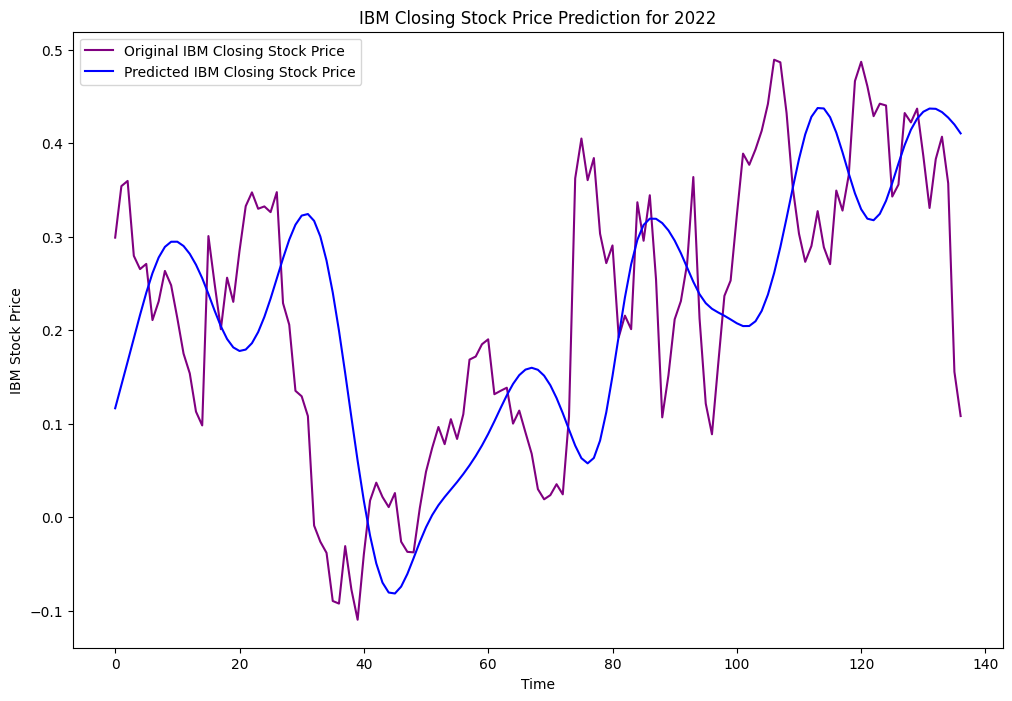

In [26]:
plt.figure(figsize=(12,8))
plt.plot(real_stock_prices,color='purple',label='Original IBM Closing Stock Price')
plt.plot(predicted_stock_prices,color='blue',label='Predicted IBM Closing Stock Price')
plt.title('IBM Closing Stock Price Prediction for 2022')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend();

In [27]:
print("RMSE:",np.sqrt(mean_squared_error(real_stock_prices,predicted_stock_prices)))
print("R2 Score:",r2_score(real_stock_prices,predicted_stock_prices))

RMSE: 0.13727778307404778
R2 Score: 0.16681740823717717


In [30]:
import plotly.express as px

# Assuming you have 'real_stock_prices' and 'predicted_stock_prices' defined
import numpy as np

# Assuming you have 'real_stock_prices' and 'predicted_stock_prices' defined

# Ensure 'real_stock_prices' and 'predicted_stock_prices' are 1-dimensional arrays
real_stock_prices = np.array(real_stock_prices).flatten()
predicted_stock_prices = np.array(predicted_stock_prices).flatten()

# Create a DataFrame with the data
import pandas as pd
df = pd.DataFrame({
    'Time': range(len(real_stock_prices)),
    'Original IBM Closing Stock Price': real_stock_prices,
    'Predicted IBM Closing Stock Price': predicted_stock_prices
})

# Create an interactive line chart with hover labels
fig = px.line(df, x='Time', y=['Original IBM Closing Stock Price', 'Predicted IBM Closing Stock Price'],
              labels={'value': 'IBM Stock Price'},
              title='IBM Closing Stock Price Prediction for 2022')

# Customize the hover information (optional)
fig.update_traces(hovertemplate='%{y:.2f}')

# Show the chart
fig.show()
